In [ ]:
SMA y EWMA para META

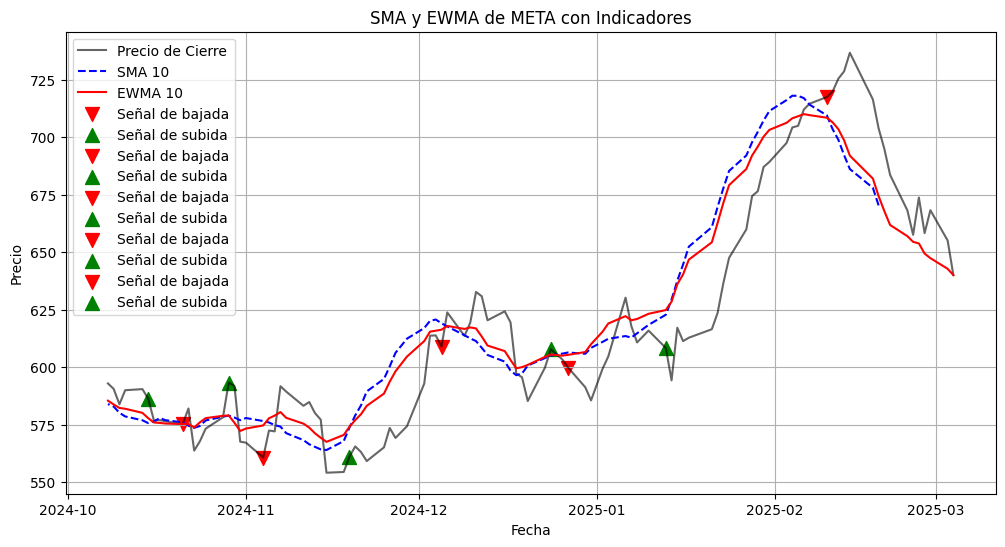

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Configuración de Alpha Vantage (necesitas una API key gratuita)
API_KEY = '75HFQUE24RUODWZB'  # Reemplaza con tu clave de API
ticker = 'META'

# Descargar datos desde Alpha Vantage (versión gratuita)
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=compact&apikey={API_KEY}&datatype=csv'
response = requests.get(url)

# Verificar si la respuesta es válida
if response.status_code != 200:
    print("Error: No se pudieron obtener datos de Alpha Vantage.")
    exit()

# Cargar datos en un DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Renombrar columnas y convertir la fecha a índice
df.rename(columns={'timestamp': 'Date', 'close': 'Close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calcular indicadores técnicos
window_sma = 10  # Ventana para SMA
span_ewma = 10  # Parámetro para EWMA

df['SMA'] = df['Close'].rolling(window=window_sma).mean()  # Media móvil simple
df['EWMA'] = df['Close'].ewm(span=span_ewma, adjust=False).mean()  # Media móvil exponencial

# Identificar momentos clave
signals = []
for i in range(1, len(df)):
    if df['EWMA'].iloc[i] > df['SMA'].iloc[i] and df['EWMA'].iloc[i - 1] <= df['SMA'].iloc[i - 1]:
        signals.append((df.index[i], df['Close'].iloc[i], 'subida'))
    elif df['EWMA'].iloc[i] < df['SMA'].iloc[i] and df['EWMA'].iloc[i - 1] >= df['SMA'].iloc[i - 1]:
        signals.append((df.index[i], df['Close'].iloc[i], 'bajada'))

# Graficar los datos
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Precio de Cierre', color='black', alpha=0.6)
plt.plot(df.index, df['SMA'], label=f'SMA {window_sma}', linestyle='--', color='blue')
plt.plot(df.index, df['EWMA'], label=f'EWMA {span_ewma}', linestyle='-', color='red')

# Añadir indicadores en forma de triángulo rojo
for date, price, signal in signals:
    color = 'green' if signal == 'subida' else 'red'
    plt.scatter(date, price, color=color, marker='v' if signal == 'bajada' else '^', s=100, label='Señal de ' + signal)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(f'SMA y EWMA de {ticker} con Indicadores')
plt.legend()
plt.grid()
plt.show()

In [ ]:
## 📊 Análisis del Gráfico de SMA y EWMA para META

### 🔹 Descripción del Gráfico:
El gráfico muestra la evolución del **precio de cierre** de las acciones de **Meta (META)** junto con dos indicadores técnicos clave:
- **SMA (Media Móvil Simple de 10 días)** → Línea azul punteada.
- **EWMA (Media Móvil Exponencial de 10 días)** → Línea roja.
- **Señales de compra y venta** → Indicadas por triángulos:
  - **Triángulos verdes** (Señal de compra) → Cuando la EWMA cruza por encima de la SMA.
  - **Triángulos rojos** (Señal de venta) → Cuando la EWMA cruza por debajo de la SMA.

---

### 📌 **Interpretación de las Señales**
1. **Señales Correctas:**
   - Se observa que varias señales de **compra** aparecen antes de subidas importantes en el precio.
   - Las señales de **venta** coinciden con zonas donde el precio comienza a bajar, especialmente en la parte final del gráfico (febrero 2025).

2. **Señales Incorrectas o Falsas:**
   - En periodos donde el precio no tiene una dirección clara (como noviembre 2024), aparecen señales de compra y venta que no generan una gran tendencia.
   - Algunas señales de venta ocurren cuando el precio ya ha comenzado a caer, mostrando el **retraso de las medias móviles**.

---

### 🔹 **Conclusión**
- **Las señales funcionan mejor en tendencias claras** y pueden ayudar a identificar momentos de compra y venta.
- **Las señales falsas ocurren en periodos de consolidación o por movimientos bruscos del mercado.**
- Para mejorar la precisión, es recomendable combinar estas señales con otros indicadores como:
  - **Volumen** (para confirmar rupturas).
  - **RSI** (para ver si el activo está sobrecomprado o sobrevendido).
  - **MACD** (para detectar cambios de tendencia).

✅ **Este análisis ayuda a entender las tendencias del precio de META, pero siempre es recomendable utilizar múltiples herramientas antes de tomar decisiones de inversión.**


In [ ]:
MACD

In [ ]:
## 📊 Análisis del MACD y su utilidad junto con SMA y EWMA

### 🔹 **¿Qué es el MACD?**
El **MACD (Moving Average Convergence Divergence)** es un indicador técnico utilizado para identificar cambios en la fuerza, dirección y duración de una tendencia en el precio de un activo.

Se compone de:
1. **Línea MACD** → Diferencia entre una media móvil exponencial corta (12 días) y una larga (26 días).
2. **Línea de Señal** → Media móvil exponencial de 9 días de la línea MACD.

---

### 📌 **Cómo Interpretar el MACD**
- **Cruce Alcista (Señal de Compra)**
  - Cuando la línea **MACD cruza por encima de la línea de señal**, indica que la tendencia alcista está ganando fuerza.
  - Este cruce se considera una **señal de compra** y puede coincidir con una señal similar en la EWMA y SMA.

- **Cruce Bajista (Señal de Venta)**
  - Cuando la línea **MACD cruza por debajo de la línea de señal**, sugiere que la tendencia alcista se está debilitando o se está formando una tendencia bajista.
  - Se considera una **señal de venta**, que puede confirmarse si la EWMA también cruza por debajo de la SMA.

- **Valores Positivos vs. Negativos**
  - Si el MACD es **positivo**, indica que la media móvil corta está por encima de la media móvil larga (fuerza alcista).
  - Si el MACD es **negativo**, indica que la media móvil corta está por debajo de la media móvil larga (fuerza bajista).

---

### 🔹 **MACD junto con SMA y EWMA**
El uso del **MACD junto con SMA y EWMA** permite mejorar la precisión del análisis técnico:

1. **Confirmación de Tendencias**
   - Cuando el MACD da una señal alcista **y** la EWMA está por encima de la SMA, hay una mayor confianza en la subida del precio.
   - Si el MACD da una señal bajista **y** la EWMA está por debajo de la SMA, se confirma una caída en el precio.

2. **Evitar Señales Falsas**
   - A veces, la EWMA puede dar señales adelantadas, pero sin una confirmación clara del MACD.
   - El MACD ayuda a evitar entradas prematuras en el mercado al verificar la fuerza de la tendencia.

3. **Detectar Divergencias**
   - Si el precio sigue subiendo pero el MACD comienza a bajar, puede ser una **señal temprana de reversión**.
   - Lo mismo ocurre si el precio sigue bajando pero el MACD empieza a subir.

---

### ✅ **Conclusión**
- **El MACD es útil para confirmar señales generadas por la SMA y la EWMA.**
- **El cruce de líneas del MACD ayuda a identificar cambios en la tendencia.**
- **Combinar estos indicadores mejora la precisión y reduce señales falsas.**
- **Siempre es recomendable usar otros indicadores como RSI o volumen para una visión más completa.**

🚀 **Este análisis permite entender la dirección del mercado y mejorar la toma de decisiones en trading.** 📈🔥


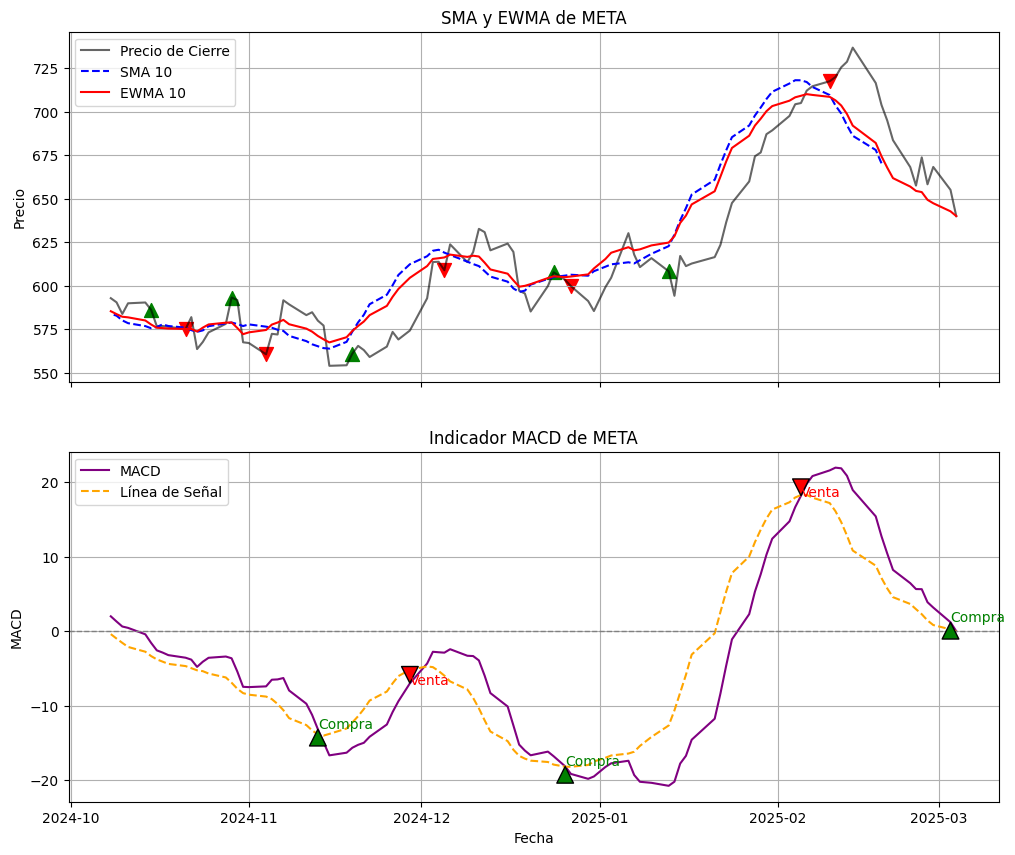

In [3]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Configuración de Alpha Vantage (necesitas una API key gratuita)
API_KEY = '75HFQUE24RUODWZB'  # Reemplaza con tu clave de API
ticker = 'META'

# Descargar datos desde Alpha Vantage (versión gratuita)
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=compact&apikey={API_KEY}&datatype=csv'
response = requests.get(url)

# Verificar si la respuesta es válida
if response.status_code != 200:
    print("Error: No se pudieron obtener datos de Alpha Vantage.")
    exit()

# Cargar datos en un DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Renombrar columnas y convertir la fecha a índice
df.rename(columns={'timestamp': 'Date', 'close': 'Close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calcular indicadores técnicos
window_sma = 10  # Ventana para SMA
span_ewma = 10  # Parámetro para EWMA

df['SMA'] = df['Close'].rolling(window=window_sma).mean()  # Media móvil simple
df['EWMA'] = df['Close'].ewm(span=span_ewma, adjust=False).mean()  # Media móvil exponencial

# Calcular MACD y la señal del MACD
short_window = 12  # Ventana corta para MACD
long_window = 26  # Ventana larga para MACD
signal_window = 9  # Señal del MACD

df['MACD'] = df['Close'].ewm(span=short_window, adjust=False).mean() - df['Close'].ewm(span=long_window, adjust=False).mean()
df['Signal Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# Identificar momentos clave
signals = []
for i in range(1, len(df)):
    if df['EWMA'].iloc[i] > df['SMA'].iloc[i] and df['EWMA'].iloc[i - 1] <= df['SMA'].iloc[i - 1]:
        signals.append((df.index[i], df['Close'].iloc[i], 'subida'))
    elif df['EWMA'].iloc[i] < df['SMA'].iloc[i] and df['EWMA'].iloc[i - 1] >= df['SMA'].iloc[i - 1]:
        signals.append((df.index[i], df['Close'].iloc[i], 'bajada'))

# Crear figura con dos gráficos separados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de precios con SMA y EWMA
ax1.plot(df.index, df['Close'], label='Precio de Cierre', color='black', alpha=0.6)
ax1.plot(df.index, df['SMA'], label=f'SMA {window_sma}', linestyle='--', color='blue')
ax1.plot(df.index, df['EWMA'], label=f'EWMA {span_ewma}', linestyle='-', color='red')

# Añadir indicadores en forma de triángulo rojo o verde
for date, price, signal in signals:
    color = 'green' if signal == 'subida' else 'red'
    ax1.scatter(date, price, color=color, marker='v' if signal == 'bajada' else '^', s=100)

ax1.set_ylabel('Precio')
ax1.set_title(f'SMA y EWMA de {ticker}')
ax1.legend()
ax1.grid()

# Gráfico de MACD
ax2.plot(df.index, df['MACD'], label='MACD', color='purple')
ax2.plot(df.index, df['Signal Line'], label='Línea de Señal', color='orange', linestyle='--')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)

# Añadir anotaciones para explicar el MACD
for i in range(1, len(df)):
    if df['MACD'].iloc[i] > df['Signal Line'].iloc[i] and df['MACD'].iloc[i - 1] <= df['Signal Line'].iloc[i - 1]:
        ax2.annotate('Compra', xy=(df.index[i], df['MACD'].iloc[i]), xytext=(df.index[i], df['MACD'].iloc[i] + 0.1),
                     arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')
    elif df['MACD'].iloc[i] < df['Signal Line'].iloc[i] and df['MACD'].iloc[i - 1] >= df['Signal Line'].iloc[i - 1]:
        ax2.annotate('Venta', xy=(df.index[i], df['MACD'].iloc[i]), xytext=(df.index[i], df['MACD'].iloc[i] - 0.1),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

ax2.set_xlabel('Fecha')
ax2.set_ylabel('MACD')
ax2.set_title(f'Indicador MACD de {ticker}')
ax2.legend()
ax2.grid()

plt.show()

In [4]:
import sys
!{sys.executable} -m pip install statsmodels



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import pandas as pd
import requests
import io

# Configuración de Alpha Vantage (necesitas una API key gratuita)
API_KEY = 'TU_API_KEY_AQUI'  # Reemplaza con tu clave de API
ticker = 'AAPL'  # Apple Inc., una acción accesible

# Descargar datos desde Alpha Vantage (versión gratuita)
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=compact&apikey={API_KEY}&datatype=csv'
response = requests.get(url)

# Verificar si la respuesta es válida
if response.status_code != 200:
    print("Error: No se pudieron obtener datos de Alpha Vantage.")
    exit()

# Cargar datos en un DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Imprimir los nombres de las columnas y primeras filas para depuración
print("Columnas disponibles en los datos descargados:", df.columns.tolist())
print("Primeras filas de los datos:")
print(df.head())

Columnas disponibles en los datos descargados: ['{']
Primeras filas de los datos:
                                                   {
0      "Information": "We have detected your API ...
1                                                  }
